<a href="https://colab.research.google.com/github/tq21/ML-Stuff/blob/master/NLP_LSTM_GRU.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals
import tensorflow_datasets as tfds
import tensorflow as tf

In [2]:
dataset, info = tfds.load('imdb_reviews/subwords8k', with_info=True, as_supervised=True)
train_dataset, test_dataset = dataset['train'], dataset['test']

Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incomplete8NUYSU/imdb_reviews-train.tfrecord


Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incomplete8NUYSU/imdb_reviews-test.tfrecord


Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incomplete8NUYSU/imdb_reviews-unsupervised.tfrecord


Dataset imdb_reviews downloaded and prepared to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0. Subsequent calls will reuse this data.


In [3]:
# Tokenize using encoder
tokenizer = info.features['text'].encoder

In [4]:
BUFFER_SIZE = 10000
BATCH_SIZE = 64

train_dataset = train_dataset.shuffle(BUFFER_SIZE)
train_dataset = train_dataset.padded_batch(BATCH_SIZE, train_dataset.output_shapes)
test_dataset = test_dataset.padded_batch(BATCH_SIZE, test_dataset.output_shapes)

Instructions for updating:
Use `tf.compat.v1.data.get_output_shapes(dataset)`.


Instructions for updating:
Use `tf.compat.v1.data.get_output_shapes(dataset)`.


In [5]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(tokenizer.vocab_size, 64),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(
    loss='binary_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 64)          523840    
_________________________________________________________________
bidirectional (Bidirectional (None, None, 128)         66048     
_________________________________________________________________
bidirectional_1 (Bidirection (None, 64)                41216     
_________________________________________________________________
dense (Dense)                (None, 64)                4160      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 65        
Total params: 635,329
Trainable params: 635,329
Non-trainable params: 0
_________________________________________________________________


In [6]:
history = model.fit(
    train_dataset,
    epochs=10,
    validation_data=test_dataset
)

Epoch 1/10
391/391 [==============================] - 108s 276ms/step - loss: 0.5379 - accuracy: 0.7276 - val_loss: 0.4462 - val_accuracy: 0.8051
Epoch 2/10
391/391 [==============================] - 108s 277ms/step - loss: 0.4208 - accuracy: 0.8164 - val_loss: 0.4235 - val_accuracy: 0.8235
Epoch 3/10
391/391 [==============================] - 108s 276ms/step - loss: 0.2963 - accuracy: 0.8856 - val_loss: 0.4134 - val_accuracy: 0.8286
Epoch 4/10
391/391 [==============================] - 108s 276ms/step - loss: 0.2236 - accuracy: 0.9166 - val_loss: 0.4259 - val_accuracy: 0.8271
Epoch 5/10
391/391 [==============================] - 108s 277ms/step - loss: 0.1894 - accuracy: 0.9316 - val_loss: 0.5102 - val_accuracy: 0.7788
Epoch 6/10
391/391 [==============================] - 108s 277ms/step - loss: 0.1734 - accuracy: 0.9378 - val_loss: 0.5305 - val_accuracy: 0.8176
Epoch 7/10
391/391 [==============================] - 108s 275ms/step - loss: 0.2559 - accuracy: 0.8988 - val_loss: 0.5252 -

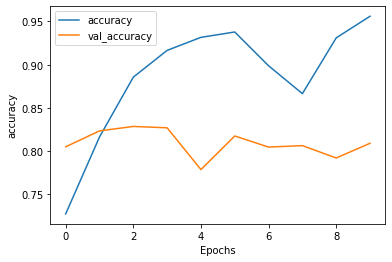

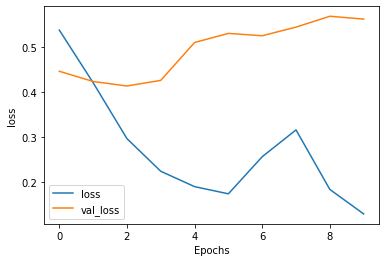

In [7]:
import matplotlib.pyplot as plt

def plot_graphs(history, string):
    plt.plot(history.history[string])
    plt.plot(history.history['val_'+string])
    plt.xlabel("Epochs")
    plt.ylabel(string)
    plt.legend([string, 'val_'+string])
    plt.show()

plot_graphs(history, 'accuracy')
plot_graphs(history, 'loss')

## GRU

In [7]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(tokenizer.vocab_size, 64),
    tf.keras.layers.Bidirectional(tf.keras.layers.GRU(32)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(
    loss='binary_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

model.summary()

In [8]:
history = model.fit(
    train_dataset,
    epochs=10,
    validation_data=test_dataset
)

Epoch 1/10
391/391 [==============================] - 108s 275ms/step - loss: 0.0969 - accuracy: 0.9675 - val_loss: 0.6518 - val_accuracy: 0.7952
Epoch 2/10
391/391 [==============================] - 108s 277ms/step - loss: 0.0703 - accuracy: 0.9775 - val_loss: 0.7229 - val_accuracy: 0.8154
Epoch 3/10
391/391 [==============================] - 108s 276ms/step - loss: 0.0746 - accuracy: 0.9754 - val_loss: 0.7058 - val_accuracy: 0.8050
Epoch 4/10
391/391 [==============================] - 108s 275ms/step - loss: 0.0615 - accuracy: 0.9806 - val_loss: 0.8470 - val_accuracy: 0.8005
Epoch 5/10
391/391 [==============================] - 108s 277ms/step - loss: 0.0402 - accuracy: 0.9886 - val_loss: 0.7497 - val_accuracy: 0.8122
Epoch 6/10
391/391 [==============================] - 108s 277ms/step - loss: 0.0504 - accuracy: 0.9830 - val_loss: 0.8921 - val_accuracy: 0.7970
Epoch 7/10
391/391 [==============================] - 108s 277ms/step - loss: 0.0383 - accuracy: 0.9882 - val_loss: 0.8502 -

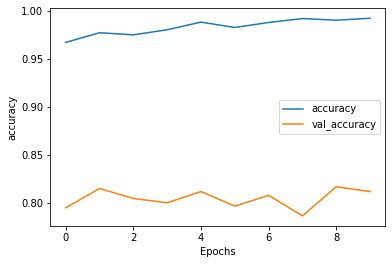

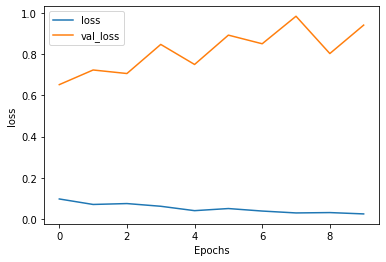

In [9]:
plot_graphs(history, 'accuracy')
plot_graphs(history, 'loss')